In [206]:
import pandas as pd

pd.options.display.max_rows = 1360

In [207]:
df = pd.read_excel('ne_10m_lakes.xlsx', sheet="sheet1")

In [208]:
img= df.iloc[2,6]
name = df.iloc[2,9]+'.jpg'
name

'Engozero.jpg'

In [209]:
df = pd.read_csv('./good_coords.csv')
df.head()

,HouseNumber,Address,City,State,Country,PostCode,County,Latitude,Longitude,name,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Wiley,British Columbia,Canada,V9N 1P9,NaN,67.415533,-126.377694,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Marsh lake,Yukon,Canada,Y0B 1T0,NaN,59.982692,-134.179318,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Truly,Montana,Canada,T9K 0K4,NaN,64.971428,-111.432358,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Sayward,British Columbia,Canada,V0J 2T0,NaN,67.186371,-125.982007,Colville Lake,NaN,NaN,NaN,NaN
4,0.0,Winter Trl,Kotlik,AK,United States,99620-0316,Wade Hampton,62.639328,-163.556980,NaN,NaN,NaN,NaN,NaN


In [210]:
df1 = df.filter(items=['Country'], axis=1)
df1.head()

,Country
0,Canada
1,Canada
2,Canada
3,Canada
4,United States


In [211]:
df2 = pd.read_csv('./count_WQI.csv')
df2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Argentina,84.27,NaN,NaN,NaN,NaN,NaN
1,Armenia,51.04,NaN,NaN,NaN,NaN,NaN
2,Australia,61.74,NaN,NaN,NaN,NaN,NaN
3,Azerbaijan,44.28,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,87.16,NaN,NaN,NaN,NaN,NaN


In [212]:
df2.rename(columns={'Unnamed: 0':'Country', 'Unnamed: 1':'WQI'}, inplace=True)
df2.head()

,Country,WQI,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Argentina,84.27,NaN,NaN,NaN,NaN,NaN
1,Armenia,51.04,NaN,NaN,NaN,NaN,NaN
2,Australia,61.74,NaN,NaN,NaN,NaN,NaN
3,Azerbaijan,44.28,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,87.16,NaN,NaN,NaN,NaN,NaN


In [8]:
#df2.set_index(keys='Country', drop=True, inplace=True)
#df2

In [213]:
df3 = pd.merge(df,df2, left_on=['Country'],right_on=['Country'], how='left', indicator=True)
df3.head()

,HouseNumber,Address,City,State,Country,PostCode,County,Latitude,Longitude,name,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,WQI,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,_merge
0,NaN,NaN,Wiley,British Columbia,Canada,V9N 1P9,NaN,67.415533,-126.377694,NaN,NaN,NaN,NaN,NaN,93.11,NaN,NaN,NaN,NaN,NaN,both
1,NaN,NaN,Marsh lake,Yukon,Canada,Y0B 1T0,NaN,59.982692,-134.179318,NaN,NaN,NaN,NaN,NaN,93.11,NaN,NaN,NaN,NaN,NaN,both
2,NaN,NaN,Truly,Montana,Canada,T9K 0K4,NaN,64.971428,-111.432358,NaN,NaN,NaN,NaN,NaN,93.11,NaN,NaN,NaN,NaN,NaN,both
3,NaN,NaN,Sayward,British Columbia,Canada,V0J 2T0,NaN,67.186371,-125.982007,Colville Lake,NaN,NaN,NaN,NaN,93.11,NaN,NaN,NaN,NaN,NaN,both
4,0.0,Winter Trl,Kotlik,AK,United States,99620-0316,Wade Hampton,62.639328,-163.556980,NaN,NaN,NaN,NaN,NaN,77.47,NaN,NaN,NaN,NaN,NaN,both


In [250]:
df4 = df3[['Latitude', 'Longitude', 'Country', 'name', 'WQI']]
df4.head()

,Latitude,Longitude,Country,name,WQI
0,67.415533,-126.377694,Canada,NaN,93.11
1,59.982692,-134.179318,Canada,NaN,93.11
2,64.971428,-111.432358,Canada,NaN,93.11
3,67.186371,-125.982007,Canada,Colville Lake,93.11
4,62.639328,-163.556980,United States,NaN,77.47


In [251]:
df4['Images'] = df4['Longitude'].map(lambda x: str(x) + '.jpg')
df4['train_test'] = 'train'
df4['train_test'].iloc[::5] = 'test'
df4.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,Latitude,Longitude,Country,name,WQI,Images,train_test
0,67.415533,-126.377694,Canada,NaN,93.11,-126.377694045249.jpg,test
1,59.982692,-134.179318,Canada,NaN,93.11,-134.179317812668.jpg,train
2,64.971428,-111.432358,Canada,NaN,93.11,-111.432358446463.jpg,train
3,67.186371,-125.982007,Canada,Colville Lake,93.11,-125.98200712226401.jpg,train
4,62.639328,-163.556980,United States,NaN,77.47,-163.556980334003.jpg,train
5,55.418135,-104.341226,Canada,NaN,93.11,-104.34122646468799.jpg,test
6,65.878953,-112.300403,Canada,NaN,93.11,-112.300403496523.jpg,train
7,50.217162,-94.382672,Canada,NaN,93.11,-94.3826717298093.jpg,train
8,65.038837,-118.595150,Canada,Hottah Lake,93.11,-118.595150417946.jpg,train
9,48.461722,-80.997832,Canada,NaN,93.11,-80.99783173624608.jpg,train


In [246]:
# df4.iloc[::5,:].map(lambda x: 'Train')#, else 'Train')
# temp['train_test'].iloc[::5] = 'test'
# temp = df4
# temp

WQI= source http://waterriskfilter.panda.org/en/CountryProfiles#1/profileDescription:
Subindex of the Environmental Performance Index (EPI). It uses three parameters measuring nutrient levels (Dissolved Oxygen, Total Nitrogen, and Total Phosphorus) and two parameters measuring water chemistry (pH and Conductivity). These parameters were selected because they cover issues of global relevance (eutrophication, nutrient pollution, acidification, and salinization) and because they are the most consistently reported.
Source: 
Link: http://epi.yale.edu/

In [247]:
df4.dtypes

Latitude      float64
Longitude     float64
Country        object
name           object
WQI             int64
Images         object
train_test     object
dtype: object

In [252]:
df4['WQI'] = df4['WQI'].map(lambda x: 1 if x>65.0 else 0)
df4

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Latitude,Longitude,Country,name,WQI,Images,train_test
0,67.415533,-126.377694,Canada,NaN,1,-126.377694045249.jpg,test
1,59.982692,-134.179318,Canada,NaN,1,-134.179317812668.jpg,train
2,64.971428,-111.432358,Canada,NaN,1,-111.432358446463.jpg,train
3,67.186371,-125.982007,Canada,Colville Lake,1,-125.98200712226401.jpg,train
4,62.639328,-163.556980,United States,NaN,1,-163.556980334003.jpg,train
5,55.418135,-104.341226,Canada,NaN,1,-104.34122646468799.jpg,test
6,65.878953,-112.300403,Canada,NaN,1,-112.300403496523.jpg,train
7,50.217162,-94.382672,Canada,NaN,1,-94.3826717298093.jpg,train
8,65.038837,-118.595150,Canada,Hottah Lake,1,-118.595150417946.jpg,train
9,48.461722,-80.997832,Canada,NaN,1,-80.99783173624608.jpg,train


In [253]:
df_filtered1 = df4[(df4.Country !='Canada') & (df4.Country !='Russia')]
df_filtered1.head()

,Latitude,Longitude,Country,name,WQI,Images,train_test
4,62.639328,-163.556980,United States,NaN,1,-163.556980334003.jpg,train
15,33.017319,-107.288341,United States,Caballo Reservoir,1,-107.28834133199.jpg,test
16,21.866511,-105.468178,Mexico,NaN,0,-105.46817844133498.jpg,train
23,46.006136,-69.340907,United States,Chesuncook Lake,1,-69.34090739537851.jpg,train
31,32.929451,-86.505828,United States,Mitchell Lake,1,-86.50582773312951.jpg,train


In [254]:
df_filtered1['WQI'].mean()

0.699867197875166

In [255]:
df_filtered1['WQI'].value_counts()

1    527
0    226
Name: WQI, dtype: int64

In [256]:
df_filtered1['Country'].value_counts()

United States                  153
China                          121
Sweden                          44
Kazakhstan                      42
Finland                         33
Australia                       31
Brazil                          24
Mexico                          23
New Zealand                     21
Mongolia                        18
Norway                          16
Argentina                       14
Germany                         13
India                           12
Poland                          10
Ethiopia                         9
Ukraine                          8
Turkey                           7
Chile                            7
Spain                            6
Tanzania                         6
Congo D.R.                       6
Bolivia                          5
Uganda                           5
South Africa                     5
Thailand                         4
Greece                           4
Zambia                           4
Ireland             

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
pd.set_option('display.max_columns', None)

from PIL import Image, ImageFilter
import PIL as pillow

import random
import cv2, os, glob
from glob import glob
seed = 42
np.random.seed(seed)
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras import backend as K
from random import sample
from scipy.misc import imresize
from sklearn.preprocessing import LabelEncoder
K.set_image_dim_ordering('th')

In [258]:
PATHTRAIN = os.path.abspath(os.path.join('./Pics_by_lat/'))
source_images_train = os.listdir(PATHTRAIN) 
PATHTEST = os.path.abspath(os.path.join('./Test_Images/'))
source_images_test = os.listdir(PATHTEST) 
print('train images:',source_images_train[0:3])
print('test images:',source_images_test[0:3])

train images: ['-100.204100308034.jpg', '-100.355534097749.jpg', '-100.42862704389.jpg']
test images: ['-100.044725309626.jpg', '-100.15037166727.jpg', '-100.485917101634.jpg']


In [259]:
cols_to_keep = ['WQI','Images','train_test']
df_filtered1= df_filtered1[cols_to_keep]

train = df_filtered1[df_filtered1['train_test'] == 'train']   # Rows in the (total Kaggle) train set
test = df_filtered1[df_filtered1['train_test'] == 'test']   # Rows in the testing set

print(train.shape)
train = train[
    train['Images'].isin(source_images_train)]   # train is already much small because of the minimum restriction
print(train.shape)
print(test.shape)
test = test[
    test['Images'].isin(source_images_test)]   # train is already much small because of the minimum restriction
print(test.shape)  # makes sense to be of the same size since all test set of Kaggle was downloaded
path = './Pics_by_lat/'


(605, 3)
(306, 3)
(148, 3)
(15, 3)


In [67]:
# df_filtered = df4[(df4.Country !='Canada') & (df4.WQI == 0)]
# df_filtered

In [68]:
# df_filtered2 = df4[(df4.Country !='Canada') & (df4.WQI == 1)]
# df_filtered2

In [69]:
#df_filtered.WQI.value_counts()

In [70]:
#df_filtered2.WQI.value_counts()


In [260]:
train['Images'].tolist()[0:2]

['-163.556980334003.jpg', '-107.160019253484.jpg']

In [261]:
source_images_train[0:2]

['-100.204100308034.jpg', '-100.355534097749.jpg']

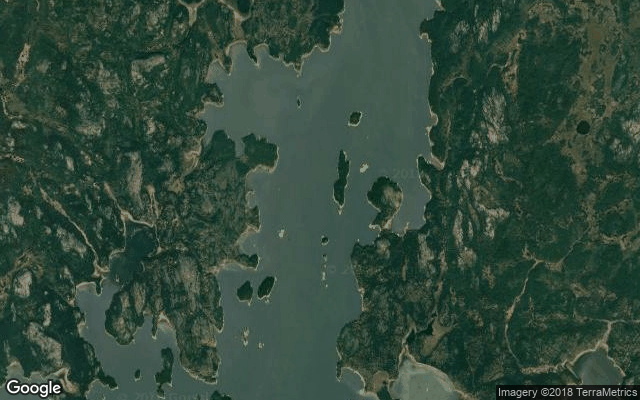

In [262]:
img = load_img(os.path.join(PATHTRAIN,source_images_train[2])) 
img

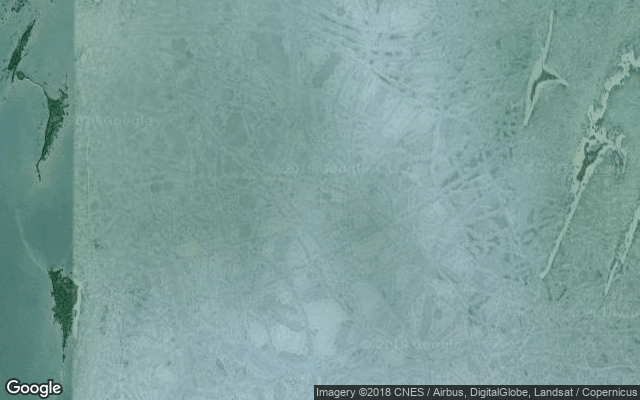

In [263]:
img_2 = load_img(os.path.join(PATHTEST,source_images_test[0]))
img_2

In [297]:
def subfolder_maker(source_images,PATH,PATHDUMP,
                    PATHDUMPNOT,original_images,
                    original_images_not):
    for image_filename in tqdm(source_images):          # source_images_train = ['1.jpg', '10.jpg', '100.jpg',...]
        img = Image.open(os.path.join(PATH, 
                                      image_filename)).convert('RGB')  # PATH contains all training or testing set
        
        if image_filename in original_images:           # original_images contains all
#             print(os.path.join(PATHDUMP, 
#                                   image_filename))
            img.save(os.path.join(PATHDUMP, 
                                  image_filename))      # PATHDUMP contains training set with Picasso paintings
        elif image_filename in original_images_not:
            img.save(os.path.join(PATHDUMPNOT, 
                                  image_filename))      # PATHDUMP contains training set with NO Picasso paintings       

In [298]:
PATHTRAIN = os.path.abspath(os.path.join('./Pics_by_lat/'))  # /Users/marcotavora/capstone/trainsetnew 
source_images_train = os.listdir(PATHTRAIN) # source_images_train = ['1.jpg', '10.jpg', '100.jpg',...]

PATHTEST = os.path.abspath(os.path.join('./Test_Images/'))
source_images_test = os.listdir(PATHTEST)  

# PATHDUMPPICASSOTRAIN is '/Users/marcotavora/capstone/trainsetpicasso/trainsetpicasso' 
PATHDUMPCLEANTRAIN = os.path.abspath(os.path.join('./Train_set_clean')) 
source_images_picasso = os.listdir(PATHDUMPCLEANTRAIN) 


PATHDUMPPOLLUTEDTRAIN = os.path.abspath(os.path.join('./Train_set_polluted'))
source_images_not_picasso = os.listdir(PATHDUMPPOLLUTEDTRAIN) 

PATHDUMPCLEANTEST = os.path.abspath(os.path.join('./Test_set_clean'))
source_images_picasso = os.listdir(PATHDUMPCLEANTEST) 

PATHDUMPPOLLUTEDTEST = os.path.abspath(os.path.join('./Test_set_polluted'))
source_images_not_picasso = os.listdir(PATHDUMPPOLLUTEDTEST) 

In [299]:
source_images_train[0:2]
print(PATHTRAIN)
print(PATHDUMPCLEANTRAIN)
print(PATHDUMPPOLLUTEDTRAIN)

['-100.204100308034.jpg', '-100.355534097749.jpg']

/Users/tovahirsch/Desktop/Capstone/Pics_by_lat
/Users/tovahirsch/Desktop/Capstone/Train_set_clean
/Users/tovahirsch/Desktop/Capstone/Train_set_polluted


In [300]:
train_polluted = train[train['WQI'] == 0]
train_clean = train[train['WQI'] == 1]
test_polluted = test[test['WQI'] == 0]
test_clean = test[test['WQI'] == 1]

In [301]:
train_clean['Images'].tolist()[0:2]

['-163.556980334003.jpg', '-107.160019253484.jpg']

In [302]:
print(source_images_train[0:2])
print(PATHTRAIN)
print(PATHDUMPCLEANTRAIN)
print(PATHDUMPPOLLUTEDTRAIN)
print(train_clean['Images'].tolist()[0:2])
print(train_polluted['Images'].tolist()[0:2])

['-100.204100308034.jpg', '-100.355534097749.jpg']
/Users/tovahirsch/Desktop/Capstone/Pics_by_lat
/Users/tovahirsch/Desktop/Capstone/Train_set_clean
/Users/tovahirsch/Desktop/Capstone/Train_set_polluted
['-163.556980334003.jpg', '-107.160019253484.jpg']
['-5.0873014838046.jpg', '31.5081864241111.jpg']


In [295]:
test_polluted.head()

,WQI,Images,train_test
680,0,50.0075308545456.jpg,test
955,0,29.7681783168854.jpg,test
1200,0,135.045293918387.jpg,test
1265,0,77.0358205171577.jpg,test


In [199]:
# !ls Pics_by_lat/

In [356]:
subfolder_maker(source_images_train,PATHTRAIN,PATHDUMPCLEANTRAIN,
                    PATHDUMPPOLLUTEDTRAIN,train_clean['Images'].tolist(),
                train_polluted['Images'].tolist())

100%|██████████| 1081/1081 [00:07<00:00, 145.89it/s]


In [272]:
subfolder_maker(source_images_test,PATHTEST,PATHDUMPCLEANTEST,PATHDUMPPOLLUTEDTEST,
                test_clean['Images'].tolist(),
                test_polluted['Images'].tolist())

 38%|███▊      | 102/267 [00:00<00:01, 123.45it/s]/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 267/267 [00:02<00:00, 121.57it/s]


In [273]:
import PIL as pillow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import os
import pandas as pd
import itertools as it
#np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [37]:
# def get_dict_from_csv():
#     directory = os.listdir(path='/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/')
#     directory = [x for x in directory if '.jpg' in x]
#     out = dict()
#     for label in directory:
#         out[label] = rn() #(df4.loc[df4['Latitude']==label.replace('.jpg', ''), 'WQI']>44.00).astype(int)
#     return out

In [28]:
# def get_dict_from_csv(path):
#     directory = os.listdir(path=path)
#     directory = [x for x in directory if '.jpg' in x]
#     out = dict()
#     for label in directory:
# #         print(label)
#         try:
#             out[label] = df5[df5['Longitude']==float(label.replace('.jpg', ''))]['WQI'].values[0]
#         except:
#             continue
#     return out

In [324]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [338]:
PATHPREVIEW = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview'

In [346]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/-100.204100308034.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview' 
                          , save_prefix='lake', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [347]:
os.path.join(PATHTRAIN,source_images_train[2])

'/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/-100.42862704389.jpg'

In [348]:
PATHPREVIEW = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview'
x = img_to_array(img) 
print('x shape is:',x.shape)

x shape is: (3, 400, 640)


In [349]:
x = x.reshape((1,) + x.shape) 
print('new x shape is:',x.shape)


new x shape is: (1, 3, 400, 640)


In [350]:
print('Name of the image file is: ',source_images_train[0])
print("Name of the image file without file format '.' is",source_images_train[0].split('.')[0])

Name of the image file is:  -100.204100308034.jpg
Name of the image file without file format '.' is -100


In [351]:
PATHPREVIEW = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview'

In [352]:
fl = 3  # file number from source_images_train
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir= PATHPREVIEW, 
                          save_prefix= source_images_train[fl].split('.')[0], 
                          save_format='jpg'):
    i += 1
    if i > 20:
        break  # to prevent the generator to loop forever

In [353]:
len(source_images_train)
len(source_images_test)

1081

267

In [395]:
# def image_gen(batch_size, y_dict, path):
#     directory = os.listdir(path=path)
#     Xout = []
#     yout = []
#     counter = 0
#     for filename in it.cycle(directory):
#         if '.jpg' in filename:
#             try:
#                 yout.append(y_dict[filename])
#                 img=cv2.imread(path + filename)
#                 img = img/255
#                 img.reshape(1,400,640,3)
#                 Xout.append(img)
#                 counter += 1
#                 if counter % batch_size == 0:
#                     yield (np.array(Xout), np.array(yout))#np.random.randint(2, size=batch_size))
#                     Xout = []
#                     yout= []
#             except:
#                 continue

In [397]:
# train_gen = image_gen(32, get_dict_from_csv('/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/'), path='/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/')
# test_gen = image_gen(32, get_dict_from_csv('/Users/tovahirsch/Desktop/Capstone/Test_Images/'),  path='/Users/tovahirsch/Desktop/Capstone/Test_Images/')

In [366]:
#set up model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 350, 350)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [378]:
train_data_dir = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat'
validation_data_dir = '/Users/tovahirsch/Desktop/Capstone/Test_Images'
# train_data_dir
# validation_data_dir
nb_train_samples = len(train_clean['Images'].tolist())+len(train_polluted['Images'].tolist())
nb_validation_samples = len(test_clean['Images'].tolist())+len(test_polluted['Images'].tolist())
epochs = 5
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, 350, 350)
# else:
#     input_shape = (img_width, img_height, 3)

In [381]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [385]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 41 images belonging to 1 classes.
Found 0 images belonging to 0 classes.
Epoch 1/5
10/19 [==============>...............] - ETA: 1:29 - loss: 1.0000e-07 - acc: 1.0000

KeyboardInterrupt: 

In [379]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/',  # this is the target directory
        target_size=(350, 350),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        PATHTEST,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 41 images belonging to 1 classes.
Found 0 images belonging to 0 classes.


In [372]:
'/Users/tovahirsch/Desktop/Capstone/Test_Images/'

'/U'

In [368]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 348, 348)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 348, 348)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 174, 174)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 172, 172)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 172, 172)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 86, 86)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 84, 84)        18496     
__________

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1200 // 32,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')   # always save your weights after training or during training

In [308]:
import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

In [373]:
history.history['val_acc']

[0.7455357142857143, 0.7053571428571429, 0.7008928571428571]

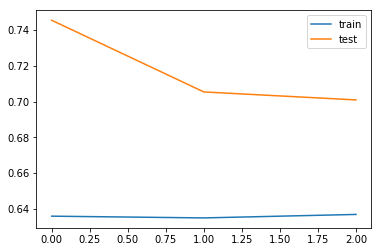

In [377]:
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='test')
plt.legend()
plt.show()

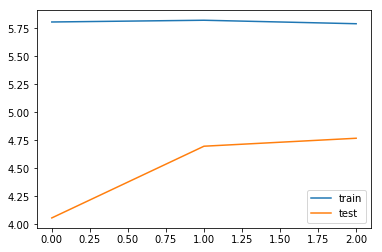

In [378]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [314]:
img = next(train_gen)[0][0]

In [321]:
model.predict(np.array([img]))

array([[1.]], dtype=float32)

In [120]:
img

'http://maps.googleapis.com/maps/api/staticmap?sensor=false&size=640x400&maptype=satellite&visible=65.7657528446762,33.5065619280378&visible=65.7257528446762,33.4665619280378'